##### Dataset

In [2]:
# Salary_Data.csv
# Location: https://mitu.co.in/dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.arange(0,10,0.25)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
       8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75])

In [5]:
y_lin = x * 4.5 + 8.23

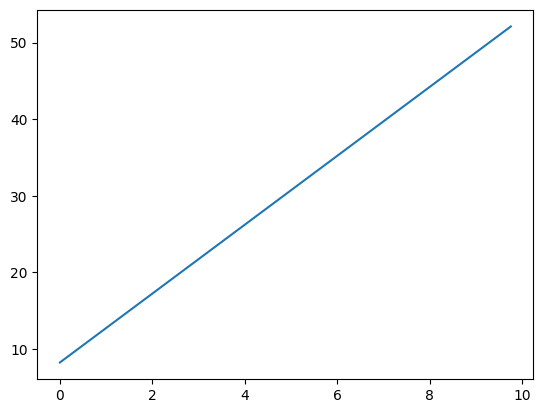

In [6]:
plt.plot(x, y_lin)

In [7]:
y_pol = x ** 2 + 56.34

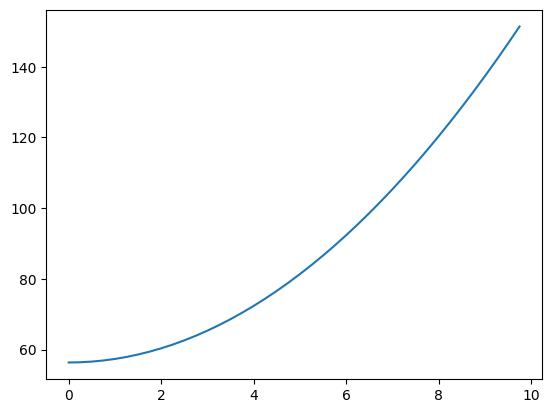

In [8]:
plt.plot(x, y_pol)

In [9]:
x = np.arange(1,11)

In [10]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1,1))

In [14]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

###### Polynomial Regression

In [18]:
df = pd.read_csv('datasets/Salary_Data.csv')
x = df[['YearsExperience']]
y = df['Salary']

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
print('Accuracy:', reg.score(x,y))

Accuracy: 0.9569566641435086


In [21]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [22]:
x_poly

array([[  1.  ,   1.1 ,   1.21],
       [  1.  ,   1.3 ,   1.69],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.7 ,  13.69],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   4.9 ,  24.01],
       [  1.  ,   5.1 ,  26.01],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   5.9 ,  34.81],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   6.8 ,  46.24],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   8.2 ,  67.24],
       [  1.  ,   8.7 ,  75.69],
       [  1.  ,   9.  ,  81.  ],
       [  1.  ,   9.5 ,  90.25],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  10.5 , 110.25]])

In [24]:
reg.fit(x_poly, y)
print('Accuracy:', reg.score(x_poly,y))

Accuracy: 0.956975168321065


In [25]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)

reg.fit(x_poly, y)
print('Accuracy:', reg.score(x_poly,y))

Accuracy: 0.9636560599375091


In [31]:
acc = []
for i in range(2,31):
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)

    reg.fit(x_poly, y)
    acc.append(reg.score(x_poly,y))

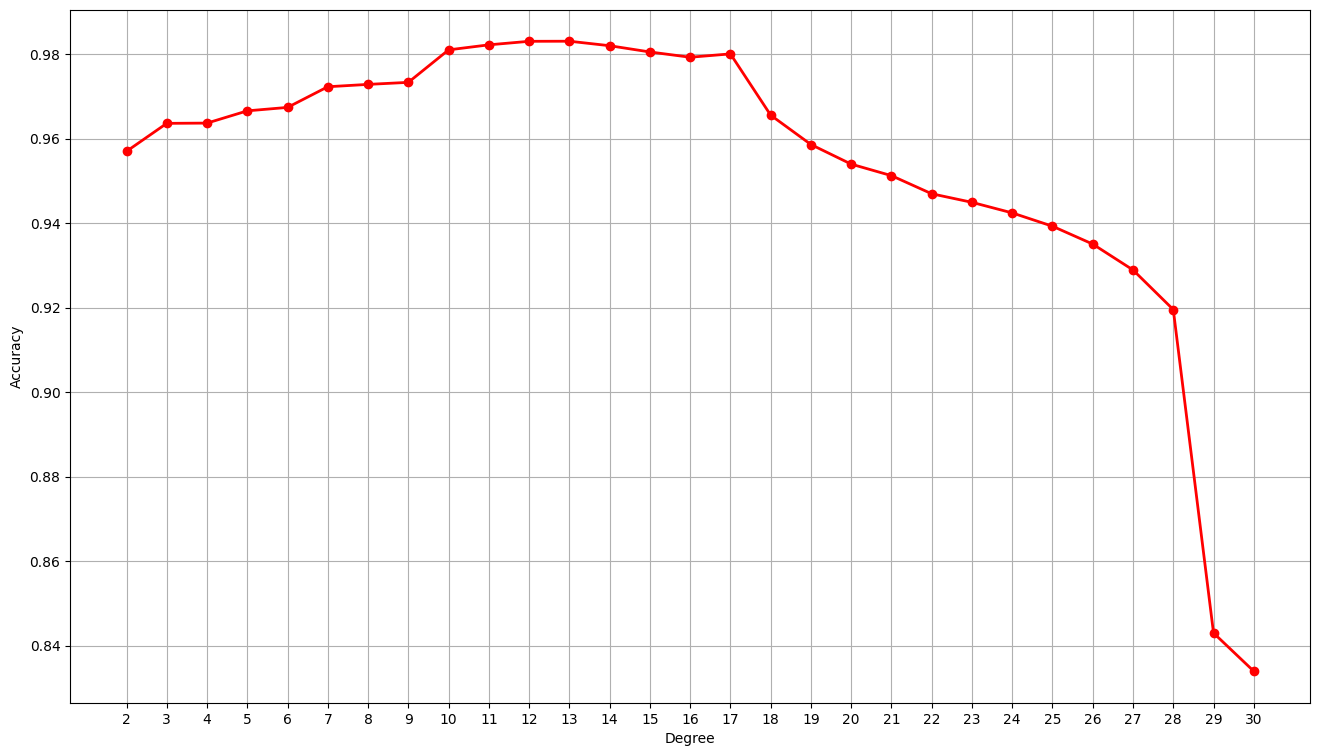

In [37]:
plt.figure(figsize=(16,9))
plt.grid()
plt.xticks(range(2,31))
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.plot(range(2,31), acc, color='r', lw=2, marker='o')

In [39]:
poly = PolynomialFeatures(degree=12)
x_poly = poly.fit_transform(x)

reg.fit(x_poly, y)
reg.score(x_poly,y)

0.9830101778689884

In [40]:
y_pred = reg.predict(x_poly)

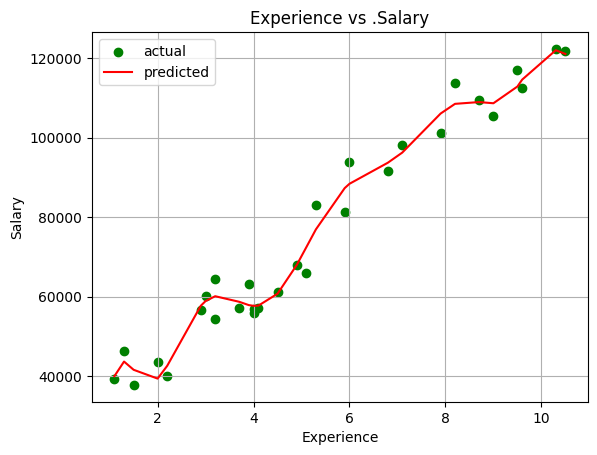

In [41]:
plt.grid()
plt.title('Experience vs .Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y, color = 'green', label = 'actual')
plt.plot(x, y_pred, color = 'red',label = 'predicted')
plt.legend()